In [60]:
import pandas as pd

In [61]:
df = pd.read_csv('practice_addition_fnp2022-fincausal-task2.csv', sep = ';')

In [62]:
df

,Index,Text,Cause,Effect
0,0,The increase in net interest income was due pr...,a $152.9 billion increase in average outstandi...,The increase in net interest income
1,1,"NPAs increased $703 million year over year, pr...",PCI loans that would have been classified as n...,NPAs increased $703 million year over year
2,2,Additional increases in noninterest income wer...,higher insurance income driven by improved pro...,Additional increases in noninterest income
3,3,"During 2020, the Company also issued $6.5 bill...",The increase is due to net income in excess of...,"During 2020, the Company also issued $6.5 bill..."
4,4,The significant increases in earnings assets a...,"the Merger, as well as impacts from the COVID-...",The significant increases in earnings assets a...
...,...,...,...,...
533,533,We recorded a gain of $15.7 million for the ye...,the partial prepayment of the Wynn Macau Term ...,We recorded a $4.6 million loss on extinguishm...
534,534,We recorded a loss of $13.1 million and $3.2 m...,change in the fair value of an interest rate c...,We recorded a loss of $13.1 million and $3.2 m...
535,535,We recorded a $4.6 million loss on extinguishm...,the partial prepayment of the Wynn Macau Term ...,We recorded a $4.6 million loss on extinguishm...
536,536,"Accordingly, operating cash flows will be impa...","During the year ended December 31, 2020, the d...","Accordingly, operating cash flows will be impa..."


In [63]:
df.at[:,'Label'] = 'causal'

In [64]:
df[' Text'] = df[' Text'].astype('str')
df[' Cause'] = df[' Cause'].astype('str')
df[' Effect'] = df[' Effect'].astype('str')

In [65]:
import random as r
r.seed(81)
for i in range(135):
    index_one = r.randint(1,537)
    index_two = r.randint(1,537)
    df = pd.concat([df,pd.DataFrame([['-','-',df.loc[index_one][' Cause'],df.loc[index_two][' Cause'],'non_causal']], columns=df.columns)])

for i in range(135):
    index_one = r.randint(1,537)
    index_two = r.randint(1,537)
    df = pd.concat([df,pd.DataFrame([['-','-',df.loc[index_one][' Cause'],df.loc[index_two][' Effect'],'non_causal']], columns=df.columns)])

for i in range(135):
    index_one = r.randint(1,537)
    index_two = r.randint(1,537)
    df = pd.concat([df,pd.DataFrame([['-','-',df.loc[index_one][' Effect'],df.loc[index_two][' Effect'],'non_causal']], columns=df.columns)])

for i in range(135):
    index_one = r.randint(1,537)
    index_two = r.randint(1,537)
    df = pd.concat([df,pd.DataFrame([['-','-',df.loc[index_one][' Effect'],df.loc[index_two][' Cause'],'non_causal']], columns=df.columns)])
    

In [66]:
df = df.drop(columns=['Index'])

In [67]:
df = df.reset_index(drop=True)

In [68]:
s = set(df[' Cause'].astype('str').to_list() + df[' Effect'].astype('str').to_list())

In [69]:
len(s)

860

In [70]:
df

,Text,Cause,Effect,Label
0,The increase in net interest income was due pr...,a $152.9 billion increase in average outstandi...,The increase in net interest income,causal
1,"NPAs increased $703 million year over year, pr...",PCI loans that would have been classified as n...,NPAs increased $703 million year over year,causal
2,Additional increases in noninterest income wer...,higher insurance income driven by improved pro...,Additional increases in noninterest income,causal
3,"During 2020, the Company also issued $6.5 bill...",The increase is due to net income in excess of...,"During 2020, the Company also issued $6.5 bill...",causal
4,The significant increases in earnings assets a...,"the Merger, as well as impacts from the COVID-...",The significant increases in earnings assets a...,causal
...,...,...,...,...
1073,-,Interest expense was $15.8 million and $20.7 m...,the $159 million environmental remediation cha...,non_causal
1074,-,The decrease in net income (loss) attributable...,lost distribution in certain product categorie...,non_causal
1075,-,"In constant currency, SG&A costs as a percenta...",Project Renewal and the European Transformatio...,non_causal
1076,-,The yield on the total loan portfolio for the ...,the Merger and growth in commercial and indust...,non_causal


In [71]:
from bertopic import BERTopic

list_sentencest = list(s)

topic_model = BERTopic()
topics, probs = topic_model.fit_transform(list_sentencest)

In [72]:
info_topic = topic_model.get_document_info(list_sentencest)
info_topic.head()

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,"the Company’s self-insurance programs, includi...",18,18_pension_benefit_defined_plans,"[pension, benefit, defined, plans, payments, a...",[•higher customer program payments in 2011 com...,pension - benefit - defined - plans - payments...,0.564519,False
1,"During the year ended December 31, 2020, the d...",7,7_operations_las_vegas_wynn,"[operations, las, vegas, wynn, boston, encore,...",[The decreases were primarily a result of lowe...,operations - las - vegas - wynn - boston - enc...,0.749771,False
2,currencies generally appreciated against the U...,2,2_foreign_currency_exchange_translation,"[foreign, currency, exchange, translation, unf...","[higher pricing (3%), higher sales volumes (4%...",foreign - currency - exchange - translation - ...,1.000000,False
3,The lower rates on long-term debt also reflect...,0,0_loans_average_notes_debt,"[loans, average, notes, debt, the, billion, pr...","[In addition, average commercial loans were im...",loans - average - notes - debt - the - billion...,1.000000,False
4,the segment’s international businesses.,-1,-1_the_in_and_of,"[the, in, and, of, to, from, 2019, 2020, as, s...",[To further improve Automotive's segment margi...,the - in - and - of - to - from - 2019 - 2020 ...,0.000000,False


In [73]:
for index,row in df.iterrows():
    df.at[index,'Topic_Cause'] = ''
    df.at[index,'Topic_Effect'] = ''
    df.at[index,'Topic_Cause'] = info_topic[info_topic['Document'] == row[' Cause']]['Name'].iloc[0]
    df.at[index,'Topic_Effect'] = info_topic[info_topic['Document'] == row[' Effect']]['Name'].iloc[0]

In [74]:
df

,Text,Cause,Effect,Label,Topic_Cause,Topic_Effect
0,The increase in net interest income was due pr...,a $152.9 billion increase in average outstandi...,The increase in net interest income,causal,0_loans_average_notes_debt,17_segment_income_prior_million
1,"NPAs increased $703 million year over year, pr...",PCI loans that would have been classified as n...,NPAs increased $703 million year over year,causal,0_loans_average_notes_debt,9_shares_income_noninterest_adjusted
2,Additional increases in noninterest income wer...,higher insurance income driven by improved pro...,Additional increases in noninterest income,causal,-1_the_in_and_of,9_shares_income_noninterest_adjusted
3,"During 2020, the Company also issued $6.5 bill...",The increase is due to net income in excess of...,"During 2020, the Company also issued $6.5 bill...",causal,9_shares_income_noninterest_adjusted,-1_the_in_and_of
4,The significant increases in earnings assets a...,"the Merger, as well as impacts from the COVID-...",The significant increases in earnings assets a...,causal,1_covid19_pandemic_as_the,9_shares_income_noninterest_adjusted
...,...,...,...,...,...,...
1073,-,Interest expense was $15.8 million and $20.7 m...,the $159 million environmental remediation cha...,non_causal,10_2020_ended_31_december,4_restructuring_costs_and_million
1074,-,The decrease in net income (loss) attributable...,lost distribution in certain product categorie...,non_causal,7_operations_las_vegas_wynn,8_sales_net_decrease_decline
1075,-,"In constant currency, SG&A costs as a percenta...",Project Renewal and the European Transformatio...,non_causal,11_sga_strategic_constant_percentage,4_restructuring_costs_and_million
1076,-,The yield on the total loan portfolio for the ...,the Merger and growth in commercial and indust...,non_causal,-1_the_in_and_of,0_loans_average_notes_debt


In [18]:
system_prompt = """You are an AI designed to extract key event components (5W1H: Who, What, When, Where, Why, How) from news articles. Your task is to analyze the given article and return only the extracted components in a structured JSON format. Each component should be concise and informative, based on the details provided in the article. The components to extract are as follows:


1. **Who**: Identify the individuals, groups, or organizations involved in the event. This may include specific people, roles, or organizations.
2. **What**: Summarize the core event or action described in the article.
3. **When**: Provide the exact time and/or date when the event occurred. If not explicitly stated, use the most relevant time frame mentioned.
4. **Where**: Specify the location where the event took place (e.g., city, country, landmark, etc.).
5. **Why**: If the article provides a reason or cause for the event, include it here. If not stated, leave this field blank or provide 'Not mentioned'.
6. **How**: Describe the method or manner in which the event occurred. This could refer to processes, mechanisms, or circumstances leading to the event.

Your output should be formatted as a JSON object. Below is an example of the expected output structure:

```json
{
  "Who": "Name or group of individuals or organizations involved in the event",
  "What": "Description of the event or action that occurred",
  "When": "Exact date and/or time when the event occurred (format YYYY-MM-DD)",
  "Where": "Location where the event took place (city, country, or specific place)",
  "Why": "The reason or cause behind the event",
  "How": "The method or manner in which the event occurred"
}
```"""

user_prompt = """
"Please read the following news article and extract the 5W1H components from the text. For each component, provide a brief and precise answer. Your response should be in the form of a JSON object with the following structure:

```json
{
  "Who": "Name or group of individuals or organizations involved in the event",
  "What": "Description of the event or action that occurred",
  "When": "Exact date and/or time when the event occurred (format YYYY-MM-DD)",
  "Where": "Location where the event took place (city, country, or specific place)",
  "Why": "The reason or cause behind the event (if provided in the text)",
  "How": "The method or manner in which the event occurred (if specified in the text)"
}
```

### Instructions for each component:
1. **Who**: Identify the individuals, groups, or organizations involved in the event. This can include names or roles (e.g., "president", "police", "protesters").
2. **What**: Summarize the core event or action described in the article. This is the primary event or situation that the article focuses on (e.g., "flood", "meeting", "discovery").
3. **When**: Extract the exact time and/or date the event occurred. If multiple dates or times are mentioned, provide the most relevant one.
4. **Where**: Identify the geographical location where the event took place. This could include cities, countries, or even specific buildings or landmarks.
5. **Why**: If the reason or cause behind the event is given in the article, provide a clear explanation here (e.g., "due to a natural disaster", "as a result of a political decision").
6. **How**: Describe the manner or method in which the event unfolded or occurred. This might be about the process, technique, or circumstances that led to the event (e.g., "due to a bomb explosion", "after negotiations").

Important: Your output must be in JSON format only. No additional text, explanations, or comments are allowed. Do not include any other information outside of the JSON structure.

Now, apply the same logic to the following news article.

### Text to analyze:
{text}
"""

In [19]:
import ollama
from ollama import chat
from ollama import ChatResponse

def LLM5W1H(model, system_prompt, user_prompt, num_ctx=10240, temperature=0):
  response: ChatResponse = chat(model=model, messages=[
    {
      'role': 'system',
      'content': system_prompt,
    },
    {
      'role': 'user',
      'content': user_prompt,
    },
  ],
                    options= {
                        'temperature': temperature,
                        'num_ctx': num_ctx,
                        'seed': 81
                    }
                                )
  return response['message']['content'].strip()

In [110]:
import json
from tqdm.notebook import tqdm

L = []
llm_model = 'gemma2:27b'
column = ' Cause'

for index,row in df.iterrows():
    texto = row[column]
    try_counter = 0
    while True:
      r = ''
      try:
        try_counter += 1
        r = LLM5W1H(llm_model,system_prompt,user_prompt.replace('{text}',texto))
        r = r.replace('```json', '')
        r = r.replace('```', '')
        #print(r)
        json_obj = json.loads(r)
        print(llm_model)
        print(json_obj)
        L.append([texto,llm_model,json_obj])
        break
      except:
        print("Erro ao processar texto, tentando novamente... ollama is running?")
        print(r)
        !nohup ollama serve > serve.log &
        !ollama list
      if try_counter > 1:
        L.append([texto,llm_model,None])
        break

gemma2:27b
{'Who': 'Not mentioned', 'What': 'Increase in average outstanding loans and securities, partially offset by a decrease in earning asset yields.', 'When': 'Not mentioned', 'Where': 'Not mentioned', 'Why': 'Not mentioned', 'How': 'Not mentioned'}
gemma2:27b
{'Who': 'Not mentioned', 'What': 'Loans classified as nonperforming', 'When': 'December 31, 2019', 'Where': 'Not mentioned', 'Why': 'Not mentioned', 'How': 'Exiting certain accommodation programs related to the CARES Act'}
gemma2:27b
{'Who': 'Insurance companies', 'What': 'Experienced increased income', 'When': 'Not mentioned', 'Where': 'Not mentioned', 'Why': 'Improved production levels and acquisitions', 'How': 'Not mentioned'}
gemma2:27b
{'Who': 'Not mentioned', 'What': 'Increase in equity', 'When': 'Not mentioned', 'Where': 'Not mentioned', 'Why': 'Net income exceeding dividends paid and positive Other Comprehensive Income (OCI)', 'How': 'Not mentioned'}
gemma2:27b
{'Who': 'Not mentioned', 'What': 'Merger impacts and ef

In [ ]:
#L_effect = L #run first

In [117]:
L_cause = L

In [119]:
lista_who = []
lista_when = []
lista_where = []

In [120]:
for l in L_effect:
    lista_who.append(l[2]['Who'])
    lista_when.append(l[2]['When'])
    lista_where.append(l[2]['Where'])

In [121]:
for l in L_cause:
    lista_who.append(l[2]['Who'])
    lista_when.append(l[2]['When'])
    lista_where.append(l[2]['Where'])


In [122]:
set_who = set(lista_who)
set_when = set(lista_when)
set_where = set(lista_where)

In [107]:
dic_when_fincausal = {'2010': ['2010'],
                     '2010, 2011, 2012': ['2010', '2011', '2012'],
                     '2010, 2011, and 2012': ['2010', '2011', '2012'],
                     '2010-2011': ['2010', '2011'],
                     '2011': ['2011'],
                     '2011 (and fourth quarter of 2010)' : ['2010', '2011'],
                     '2011 and 2010': ['2010', '2011'],
                     '2011 and 2012': ['2011', '2012'],
                     '2011, 2010': ['2010', '2011'],
                     '2011, 2012' : ['2011', '2012'],
                     '2011-2012' : ['2011', '2012'],
                     '2012': ['2012'],
                     '2012 and 2011' : ['2011', '2012'],
                     '2012, 2011': ['2011', '2012'],
                     '2012-12-31': ['2012'],
                     '2013' : ['2013'],
                     '2013, 2012' : ['2012', '2013'],
                     '2013-12-31': ['2013'],
                     '2018': ['2018'],
                     '2018, 2019, 2020': ['2018', '2019', '2020'],
                     '2018-01-01' : ['2018'],
                     '2019' : ['2019'],
                     '2019 and 2018' : ['2018', '2019'],
                     '2019 compared to 2018': ['2018', '2019'],
                     '2019, 2018' : ['2018', '2019'],
                     '2019-04-18' : ['2019'],
                     '2019-06-23' : ['2019'],
                     '2019-12-31' : ['2019'],
                     '2019-2020' : ['2019', '2020'],
                     '2020': ['2020'],
                     '2020 (compared to 2019)': ['2019', '2020'],
		             '2020 and 2019': ['2019', '2020'],
		             '2020, 2019': ['2019', '2020'],
		             '2020, 2019, and 2018': ['2018','2019', '2020'],
		             '2020-12-27': ['2020'],
		             '2020-12-31': ['2020'],
		             '2020-Q4': ['2020'],
		             '2021' : ['2021'],
		             '2021 and the years ahead': ['2021'],
                     'As of December 31, 2012 and 2011' : ['2011', '2012'],
					 'As of December 31, 2020' : ['2020'],
					 'August 2011 - December 31, 2012' : ['2011','2012'],
					 'Beginning in March' : ['Beginning in March'],
					 'Beginning in March 2020' : ['2020'],
					 'By the end of 2021' : ['2021'],
					 'December 2012' : ['2012'],
					 'December 31, 2011' : ['2011'],
					 'December 31, 2012' : ['2012'],
					 'December 31, 2012 and 2011' : ['2011', '2012'],
					 'December 31, 2013' : ['2013'],
					 'December 31, 2019' : ['2019'],
					 'December 31, 2020' : ['2020'],
                     'During 2011' : ['2011'],
					 'During 2012' : ['2012'],
					 'During 2020' : ['2020'],
					 'During the winter and spring' : ['During the winter and spring'],
					 'Current year' : ['Current year'],
					 'Current year and prior year' : ['Current year and prior year'],
					 'December 1' : ['December 1'],
                     'During the year ended December 31, 2020' : ['2020'],
					 'End of 2013' : ['2013'],
					 'End of 2019' : ['2019'],
					 'February 2020' : ['2020'],
					 'First and second quarters of the year' : ['First and second quarters of the year'],
					 'First half of 2013' : ['2013'],
					 'First half of 2020' : ['2020'],
					 'First half of the year' : ['First half of the year'],
					 'First quarter of 2012' : ['2012'],
					 'For the year ended December 31, 2020' : ['2020'],
					 'Fourth quarter of 2020' : ['2020'],
					 'January 2012' : ['2012'],
					 'January 2013' : ['2013'],
					 'January 2021' : ['2021'],
					 'July 2012, during 2012' : ['2012'],
					 'June 2012' : ['2012'],
					 'June 2019' : ['2019'],
					 'June 2019, February 2020' : ['2019', '2020'],
					 'June 2020' : ['2020'],
					 'March 2020, April 2020' : ['2020'],
                     'Primarily during the first half of the year' : ['Primarily during the first half of the year'],
					 'Prior to June 2019' : ['2019'],
					 'Second half of 2011 and first quarter of 2012' : ['2011', '2012'],
					 'Third quarter of 2013' : ['2013'],
					 'Third quarter of 2020' : ['2020'],
					 'Through December 31, 2012' : ['2012'],
					 'Through the end of 2020' : ['2020'] ,
					 'Year ended December 31, 2019' : ['2019'],
					 'Years ended December 31, 2020 and 2019' : ['2019', '2020'],
					 'Years ended December 31, 2020, 2019 and 2018' : ['2018', '2019', '2020']}

In [128]:
dic_who_fincausal = {
 'Airlines' : 'Airlines',
 'American Airlines' : 'Airlines',
 'Architectural Coatings – EMEA' : 'Architectural Coatings – EMEA',
 'Automotive Group' : 'Automotive',
 'Automotive OEMs' : 'Automotive',
 'Automotive group' : 'Automotive',
 'Automotive segment' : 'Automotive',
 'Banking industry' : 'Banking industry',
 'Borrowers' : 'Borrowers',
 'Businesses' : 'Businesses',
 'Businesses and consumers' : 'Businesses',
 'Businesses in a specific segment' : 'Businesses',
 'CAS Medical Systems, Inc. (CASMED)' : 'CAS Medical Systems, Inc. (CASMED)',
 'Calphalon' : 'Calphalon',
 'Casinos' : 'Casinos',
 'Clinical Labs' : 'Clinical Labs',
 'Coleman' : 'Coleman',
 'Companies' : 'Company',
 'Company' : 'Company',
 'Company (not specifically named)' : 'Company',
 'Company (not specified)' : 'Company',
 'Company employees' : 'Company',
 'Company selling enhanced surgical recovery products' : 'Company',
 'Consumer Banking and Wealth' : 'Consumers',
 'Consumers' : 'Consumers',
 'Corporate and Commercial Banking' : 'Corporations',
 'Corporate and Institutional Group' : 'Corporations',
 'Corporations' : 'Corporations',
 'Currencies' : 'Currencies',
 'Customer' : 'Customers',
 'Customers' : 'Customers',
 'Delta Air Lines' : 'Airlines',
 'Delta Air Lines and the U.S. Department of the Treasury' : 'Airlines',
 'Dx' : 'Dx',
 'Employers' : 'Employers',
 'Encore Boston Harbor' : 'Encore Boston Harbor',
 'Encore Boston Harbor developers' : 'Encore Boston Harbor',
 'Every coatings business except aerospace' : 'Every coatings business except aerospace',
 'Federal Reserve' : 'Federal Reserve',
 'Financial institutions' : 'Financial institutions',
 'General Electric' : 'General Electric',
 'Glass segment' : 'Glass segment',
 'Global population' : 'Global population',
 'Grupo Aeroméxico, LATAM' :  'Airlines',
 'Home Fragrance business unit' : 'Home Fragrance business unit',
 'Home Solutions segment' : 'Home Solutions segment',
 'Homeowners' : 'Homeowners',
 'Hunter Douglas' : 'Hunter Douglas',
 'Industrial Coatings segment' : 'Industrial segment',
 'Industrial Parts Group' : 'Industrial segment',
 'Industrial segment' : 'Industrial segment',
 'Insurance companies' : 'Insurance companies',
 'International Air Transport Association (IATA)' : 'Airlines',
 'Investors' : 'Investors',
 'Investors holding securities portfolios' : 'Investors',
 'LHFS' : 'LHFS',
 'Labcorp' : 'Labcorp',
 'Las Vegas Operations and Macau Operations' : 'Operations',
 'Macau Operations, Las Vegas Operations, Encore Boston Harbor' : 'Operations',
 'Many countries' : 'Many countries',
 'Massachusetts Gaming Commission' : 'Massachusetts Gaming Commission',
 'Medtronic' : 'Medtronic',
 'North American and European markets' : 'North American and European markets',
 'North American and international businesses' : 'North American and international businesses',
 'Optical and Specialty Materials' : 'Optical and Specialty Materials',
 'PPG' : 'PPG',
 'Paper Mate' : 'Paper Mate',
 'Project Renewal' : 'Project Renewal',
 'Project Renewal and the European Transformation Plan' : 'Project Renewal and the European Transformation Plan',
 'Refineries' : 'Refineries',
 'Refinery' : 'Refineries',
 'Restaurants, Las Vegas Operations' : 'Restaurants, Las Vegas Operations',
 'Retailers in North America and Asia Pacific markets' : 'Retailers in North America and Asia Pacific markets',
 "S&P, Moody's" : "S&P, Moody's",
 'SG&A (Selling, General & Administrative Expenses)' : 'SG&A (Selling, General & Administrative Expenses)',
 'Shareholders' : 'Shareholders',
 'Silicas business' : 'Silicas business',
 "Standard & Poor's, Fitch" : "Standard & Poor's, Fitch",
 'SunTrust' : 'SunTrust',
 'Technology businesses' : 'Technology businesses',
 'The Company' : 'The Company',
 "The Company's Chief Executive Officer" : 'The Company',
 'The Company, Dx' : 'The Company',
 'The Company, Industrial Group' : 'The Company',
 'The Company, holders of Convertible Notes' : 'The Company',
 'The International Monetary Fund (IMF)' : 'The International Monetary Fund (IMF)',
 'The World Bank' : 'The World Bank',
 'The company (speaker not identified)' : 'The Company',
 'The company (speaker)' : 'The Company',
 'The company receiving payroll support payments' : 'The Company',
 'The company reporting earnings' : 'The Company',
 'The company reporting the information' : 'The Company',
 'The refinery' : 'The refinery',
 'The speaker (likely a company representative)' : 'The speaker',
 "The speaker's company (not explicitly named)" : 'The speaker',
 'Third-party refineries' : 'The refinery',
 'Transitions' : 'Transitions',
 'Truist' : 'Truist',
 'U.S. Department of the Treasury' : 'U.S. Government',
 'U.S. dollar' : 'U.S. Government',
 'US Congress' : 'U.S. Government',
 'US corporations' : 'U.S. Government',
 'US lawmakers' : 'U.S. Government',
 'United States Trade Representative (USTR)' : 'U.S. Government',
 'Wynn Las Vegas' : 'Wynn',
 'Wynn Macau' : 'Wynn',
 "Wynn Palace, Wynn Macau, the Company's Las Vegas Operations, and Encore Boston Harbor" : 'Wynn',
 'Wynn Resorts' : 'Wynn',
 'Wynn Resorts, Limited' : 'Wynn',
 'Yankee Candle' : 'Yankee Candle',
 'Zambia and its creditors' : 'Zambia and its creditors'}

In [127]:
dic_where_fincausal = {
 'Asia' : 'Asia',
 'Asia Pacific' : 'Asia',
 'Asian marine new-build market' : 'Asia',
 'Boston Harbor' : 'Boston Harbor',
 'Countries in which PPG operates' : 'Countries in which PPG operates',
 'Domestic region' : 'Domestic region',
 'EMEA (Europe, Middle East, and Africa)' : 'EMEA (Europe, Middle East, and Africa)',
 'EMEA segment' : 'EMEA (Europe, Middle East, and Africa)',
 'Emerging markets' : 'Emerging markets',
 'Encore Boston Harbor, Las Vegas Operations' : 'Encore Boston Harbor, Las Vegas Operations',
 'Europe' : 'Europe',
 'Europe and the United States' : 'Europe and the United States',
 'Europe, Middle East, and Africa region' : 'EMEA (Europe, Middle East, and Africa)',
 'European markets' : 'Europe',
 'European region and Brazil' : 'European region and Brazil',
 'Former chromium manufacturing plant and associated sites in New Jersey' : 'Former chromium manufacturing plant and associated sites in New Jersey',
 'Global' : 'Global',
 'Jersey City, New Jersey' : 'Jersey City, New Jersey',
 'Las Vegas' : 'Las Vegas',
 'Las Vegas Operations' : 'Las Vegas',
 'Las Vegas Operations and Encore Boston Harbor' : 'Las Vegas',
 'Las Vegas Operations, Wynn Palace, Wynn Macau, and Encore Boston Harbor' : 'Las Vegas',
 'Las Vegas and Macau' : 'Las Vegas',
 'Las Vegas, Macau' : 'Las Vegas',
 'Las Vegas, Macau, and Boston' : 'Las Vegas',
 'Las Vegas, Macau, and Boston Harbor' : 'Las Vegas',
 'Latin America and Asia Pacific' : 'Latin America and Asia Pacific',
 'Latin America and Asia Pacific regions' : 'Latin America and Asia Pacific',
 'Latin American markets and Western Europe' : 'Latin American markets and Western Europe',
 'Macau, Las Vegas, Boston Harbor' : 'Las Vegas',
 'Massachusetts' : 'Massachusetts',
 'North America' :'North America' ,
 'North America and Asia Pacific markets' : 'North America and Asia Pacific',
 'North America and Asia Pacific region' : 'North America and Asia Pacific',
 'North America and Australasia' : 'North America and Australasia',
 'North America and Europe' : 'Europe and the United States',
 'North America and International markets' : 'North America',
 'North America and international markets' : 'North America',
 'North America, Latin America' : 'North America, Latin America',
 'North America, with offsetting trends in Europe and China' : 'North America, with offsetting trends in Europe and China',
 'Primarily in the United States' : 'United States',
 'U.S. and Europe' : 'Europe and the United States',
 'United States' : 'United States',
 'Western Europe' : 'Europe',
 'Worldwide' : 'Global',
 'Wynn Palace, Wynn Macau, and Las Vegas Operations' : 'Las Vegas'}

In [133]:
pd.DataFrame(L_effect)[2]

0       {'Who': 'Not mentioned', 'What': 'Increase in ...
1       {'Who': 'Not mentioned', 'What': 'NPAs (Non-Pe...
2       {'Who': 'Not mentioned', 'What': 'Additional i...
3       {'Who': 'The Company', 'What': 'Issued long-te...
4       {'Who': 'Not mentioned', 'What': 'Significant ...
                              ...                        
1073    {'Who': 'Not mentioned', 'What': 'Environmenta...
1074    {'Who': 'Coleman', 'What': 'Experienced lost d...
1075    {'Who': 'Project Renewal', 'What': 'Incurred r...
1076    {'Who': 'Not mentioned', 'What': 'Merger resul...
1077    {'Who': 'Not mentioned', 'What': 'Decrease in ...
Name: 2, Length: 1078, dtype: object

In [134]:
df.at[:,'5w1h_effect'] = pd.DataFrame(L_effect)[2]
df.at[:,'5w1h_cause'] = pd.DataFrame(L_cause)[2]

In [135]:
df

,Text,Cause,Effect,Label,Topic_Cause,Topic_Effect,5w1h_effect,5w1h_cause
0,The increase in net interest income was due pr...,a $152.9 billion increase in average outstandi...,The increase in net interest income,causal,0_loans_average_notes_debt,17_segment_income_prior_million,"{'Who': 'Not mentioned', 'What': 'Increase in ...","{'Who': 'Not mentioned', 'What': 'Increase in ..."
1,"NPAs increased $703 million year over year, pr...",PCI loans that would have been classified as n...,NPAs increased $703 million year over year,causal,0_loans_average_notes_debt,9_shares_income_noninterest_adjusted,"{'Who': 'Not mentioned', 'What': 'NPAs (Non-Pe...","{'Who': 'Not mentioned', 'What': 'Loans classi..."
2,Additional increases in noninterest income wer...,higher insurance income driven by improved pro...,Additional increases in noninterest income,causal,-1_the_in_and_of,9_shares_income_noninterest_adjusted,"{'Who': 'Not mentioned', 'What': 'Additional i...","{'Who': 'Insurance companies', 'What': 'Experi..."
3,"During 2020, the Company also issued $6.5 bill...",The increase is due to net income in excess of...,"During 2020, the Company also issued $6.5 bill...",causal,9_shares_income_noninterest_adjusted,-1_the_in_and_of,"{'Who': 'The Company', 'What': 'Issued long-te...","{'Who': 'Not mentioned', 'What': 'Increase in ..."
4,The significant increases in earnings assets a...,"the Merger, as well as impacts from the COVID-...",The significant increases in earnings assets a...,causal,1_covid19_pandemic_as_the,9_shares_income_noninterest_adjusted,"{'Who': 'Not mentioned', 'What': 'Significant ...","{'Who': 'Not mentioned', 'What': 'Merger impac..."
...,...,...,...,...,...,...,...,...
1073,-,Interest expense was $15.8 million and $20.7 m...,the $159 million environmental remediation cha...,non_causal,10_2020_ended_31_december,4_restructuring_costs_and_million,"{'Who': 'Not mentioned', 'What': 'Environmenta...","{'Who': 'Not mentioned', 'What': 'Interest exp..."
1074,-,The decrease in net income (loss) attributable...,lost distribution in certain product categorie...,non_causal,7_operations_las_vegas_wynn,8_sales_net_decrease_decline,"{'Who': 'Coleman', 'What': 'Experienced lost d...","{'Who': 'Wynn Resorts, Limited', 'What': 'Decr..."
1075,-,"In constant currency, SG&A costs as a percenta...",Project Renewal and the European Transformatio...,non_causal,11_sga_strategic_constant_percentage,4_restructuring_costs_and_million,"{'Who': 'Project Renewal', 'What': 'Incurred r...","{'Who': 'Not mentioned', 'What': 'SG&A costs d..."
1076,-,The yield on the total loan portfolio for the ...,the Merger and growth in commercial and indust...,non_causal,-1_the_in_and_of,0_loans_average_notes_debt,"{'Who': 'Not mentioned', 'What': 'Merger resul...","{'Who': 'Not mentioned', 'What': 'Loan portfol..."


In [136]:
df.to_csv('FinCausal.csv', index=False)

In [15]:
import json

def read_jsonl(file_name):
    records = []
    with open(file_name, "r") as r:
        for line in r:
            record = json.loads(line)
            records.append(record)
    return records

In [16]:
import pandas as pd
en_train_records = read_jsonl("Headlines/en/simple/train.jsonl")
en_val_records = read_jsonl("Headlines/en/simple/val.jsonl")
en_test_records = read_jsonl("Headlines/en/simple/test.jsonl")
en_records = en_train_records + en_val_records + en_test_records
df = pd.DataFrame(en_records)

In [17]:
df

,full_result,full_agreement,full_ds_result,full_ds_confidence,simple_result,simple_agreement,simple_ds_result,simple_ds_confidence,left_title,right_title,left_url,right_url,left_timestamp,right_timestamp,id,has_link,label
0,left_right_cause,0.7,left_right_cause,0.999951,left_right,0.7,left_right,0.999806,Indian government brushes off Indian tax offic...,Inquiry against 50 IRS officers over suggestin...,https://www.moneycontrol.com/news/business/eco...,https://www.moneycontrol.com/news/business/eco...,1587934800,1587934800,en_tg_1659,1,1
1,right_left_cause,0.8,right_left_cause,0.999998,right_left,0.8,right_left,0.999998,Insensitive or lost in translation? Twitter we...,Coronavirus: Why should I give money to lower-...,https://scroll.in/field/960310/insensitive-or-...,https://scroll.in/field/960307/coronavirus-why...,1587962640,1587946740,en_tg_1144,1,2
2,bad,0.8,bad,0.999995,not_cause,1.0,not_cause,0.999966,Why Reliance Industries share price has gained...,IndusInd Bank stock rises over 6% ahead of Q4 ...,https://www.businesstoday.in/markets/company-s...,https://www.businesstoday.in/markets/company-s...,1587965880,1587954720,en_tg_976,1,0
3,rel,0.8,rel,0.999951,not_cause,1.0,not_cause,0.999945,Meizu 17 teaser poster confirms 64MP Sony IMX6...,Meizu 17 Pro has Super wireless mCharge support,https://www.gizmochina.com/2020/04/27/meizu-17...,https://www.gizmochina.com/2020/04/27/meizu-17...,1587956479,1587968663,en_tg_878,1,0
4,bad,0.9,bad,1.000000,not_cause,1.0,not_cause,0.999991,10 things you need to know before the opening ...,'One of the most ridiculous deals that I've ev...,https://markets.businessinsider.com/news/stock...,https://markets.businessinsider.com/news/stock...,1587971880,1587955500,en_tg_519,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,left_right_cause,0.6,left_right_cause,0.999990,left_right,0.7,left_right,0.999998,"Visa, OCI card suspension prevents several Ind...",Indian govt will soon take decision on OCI vis...,https://www.thehindu.com/news/national/visa-oc...,https://www.thehindu.com/news/national/indian-...,1589238945,1589747280,en_tg_2638,1,1
5412,rel,0.6,rel,1.000000,not_cause,0.8,not_cause,0.999996,Michael Jordan game-worn sneakers sell for rec...,"Jazz tried to troll Michael Jordan, Bulls with...",https://www.foxnews.com/sports/michael-jordan-...,https://www.foxnews.com/sports/utah-jazz-micha...,1589737326,1589748551,en_tg_3190,1,0
5413,right_left_cause,0.7,right_left_cause,0.999983,right_left,0.7,right_left,0.999774,Some local churches resume indoor services aft...,Judge issues order to allow indoor worship in ...,https://www.wbtv.com/2020/05/17/some-local-chu...,https://www.wbtv.com/2020/05/16/judge-issues-o...,1589748594,1589646430,en_tg_1397,1,2
5414,same,0.5,same,0.999312,not_cause,0.8,not_cause,0.999956,House passes $3 trillion coronavirus relief bi...,House Democrats vote to pass new relief packag...,https://www.businessinsider.com/house-passes-c...,https://www.businessinsider.com/personal-finan...,1589581790,1589802780,en_tg_5307,1,0


<Axes: >

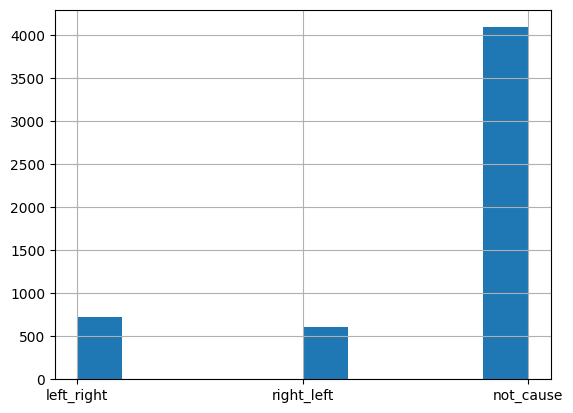

In [18]:
df.simple_result.hist()

In [19]:
df.to_csv('Headlines.csv', index=False)